## Grid Effects and Numerical Accuracy

Load dependencies

In [1]:
using PerlaTonettiWaugh 

┌ Info: Recompiling stale cache file C:\Users\Arnav Sood\.julia\compiled\v1.0\PerlaTonettiWaugh\Zi3ee.ji for PerlaTonettiWaugh [d2cacc76-b06b-11e8-362b-f18d03a16405]
└ @ Base loading.jl:1190


In [2]:
using LinearAlgebra, Compat, Statistics

Define parameters and run one experiment

In [111]:
# Grid spacing 
z_max = 10.
z_grid = unique([range(0., 0.1, length = 400)' range(0.1, 1., length = 400)' range(1., z_max, length = 100)'])

# Define common objects. 
d_0 = 3.07
d_T = 2.5019
params = (ρ = 0.02, σ = 3.9896, N = 10, θ = 4.7060, γ = 1.00, κ = 0.0103, ζ = 1, η = 0, Theta = 1, χ = 0.4631, υ = 0.0775, μ = 0, δ = 0.053) # Baselines per Jesse. 
# time 0 vs T parameters objects 
params_0 = merge(params, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T

# Stationary solutions
time0_numerical = stationary_numerical(params_0, z_grid) 
time0_algebraic = stationary_algebraic(params_0)
timeT_numerical = stationary_numerical(params_T, z_grid)
timeT_algebraic = stationary_algebraic(params_T);

In [112]:
println("The time 0 growth rates are (numerical: $(time0_numerical.g), algebraic: $(time0_algebraic.g))")
println("The time T growth rates are (numerical: $(timeT_numerical.g), algebraic: $(timeT_algebraic.g))")

The time 0 growth rates are (numerical: 0.010431663126086255, algebraic: 0.009228265219886471)
The time T growth rates are (numerical: 0.020115748038580083, algebraic: 0.01987357910057937)


In [113]:
@show timeT_numerical.λ_ii
@show timeT_algebraic.λ_ii

timeT_numerical.λ_ii = 0.7582123282197529
timeT_algebraic.λ_ii = 0.7564720684820309


0.7564720684820309

## Iterating over z_max

Load deps

In [114]:
using Plots

In [115]:
z_maxes = range(5., 15., step = 1.)
plots = []

for z_max in z_maxes
    z_grid = unique([range(0., 0.1, length = 400)' range(0.1, 1., length = 400)' range(1., z_max, length = 100)'])
    time0_numerical = stationary_numerical(params_0, z_grid) 
    time0_algebraic = stationary_algebraic(params_0)
    timeT_numerical = stationary_numerical(params_T, z_grid)
    timeT_algebraic = stationary_algebraic(params_T)
    println("The time 0 growth rates are (numerical: $(time0_numerical.g), algebraic: $(time0_algebraic.g))")
    println("The time T growth rates are (numerical: $(timeT_numerical.g), algebraic: $(timeT_algebraic.g))")
    p = plot(z_grid, time0_numerical.v_tilde, title = "numerical value function (time 0), z_max = $z_max", label = "")
    plot!(p, [log(time0_numerical.z_hat)], seriestype = "vline", label = "log(z_hat)", lw = 3, legend = :topright)
    push!(plots, p)
end 

The time 0 growth rates are (numerical: 0.01035943682217254, algebraic: 0.009228265219886471)
The time T growth rates are (numerical: 0.020054191044689522, algebraic: 0.01987357910057937)
The time 0 growth rates are (numerical: 0.010391085584713746, algebraic: 0.009228265219886471)
The time T growth rates are (numerical: 0.020082482893765942, algebraic: 0.01987357910057937)
The time 0 growth rates are (numerical: 0.010403012886262593, algebraic: 0.009228265219886471)
The time T growth rates are (numerical: 0.020092186138377648, algebraic: 0.01987357910057937)
The time 0 growth rates are (numerical: 0.010412152236653807, algebraic: 0.009228265219886471)
The time T growth rates are (numerical: 0.020099432548301436, algebraic: 0.01987357910057937)
The time 0 growth rates are (numerical: 0.010421523021253685, algebraic: 0.009228265219886471)
The time T growth rates are (numerical: 0.020107113852722687, algebraic: 0.01987357910057937)
The time 0 growth rates are (numerical: 0.01043166312608

In [116]:
gr()

Plots.GRBackend()

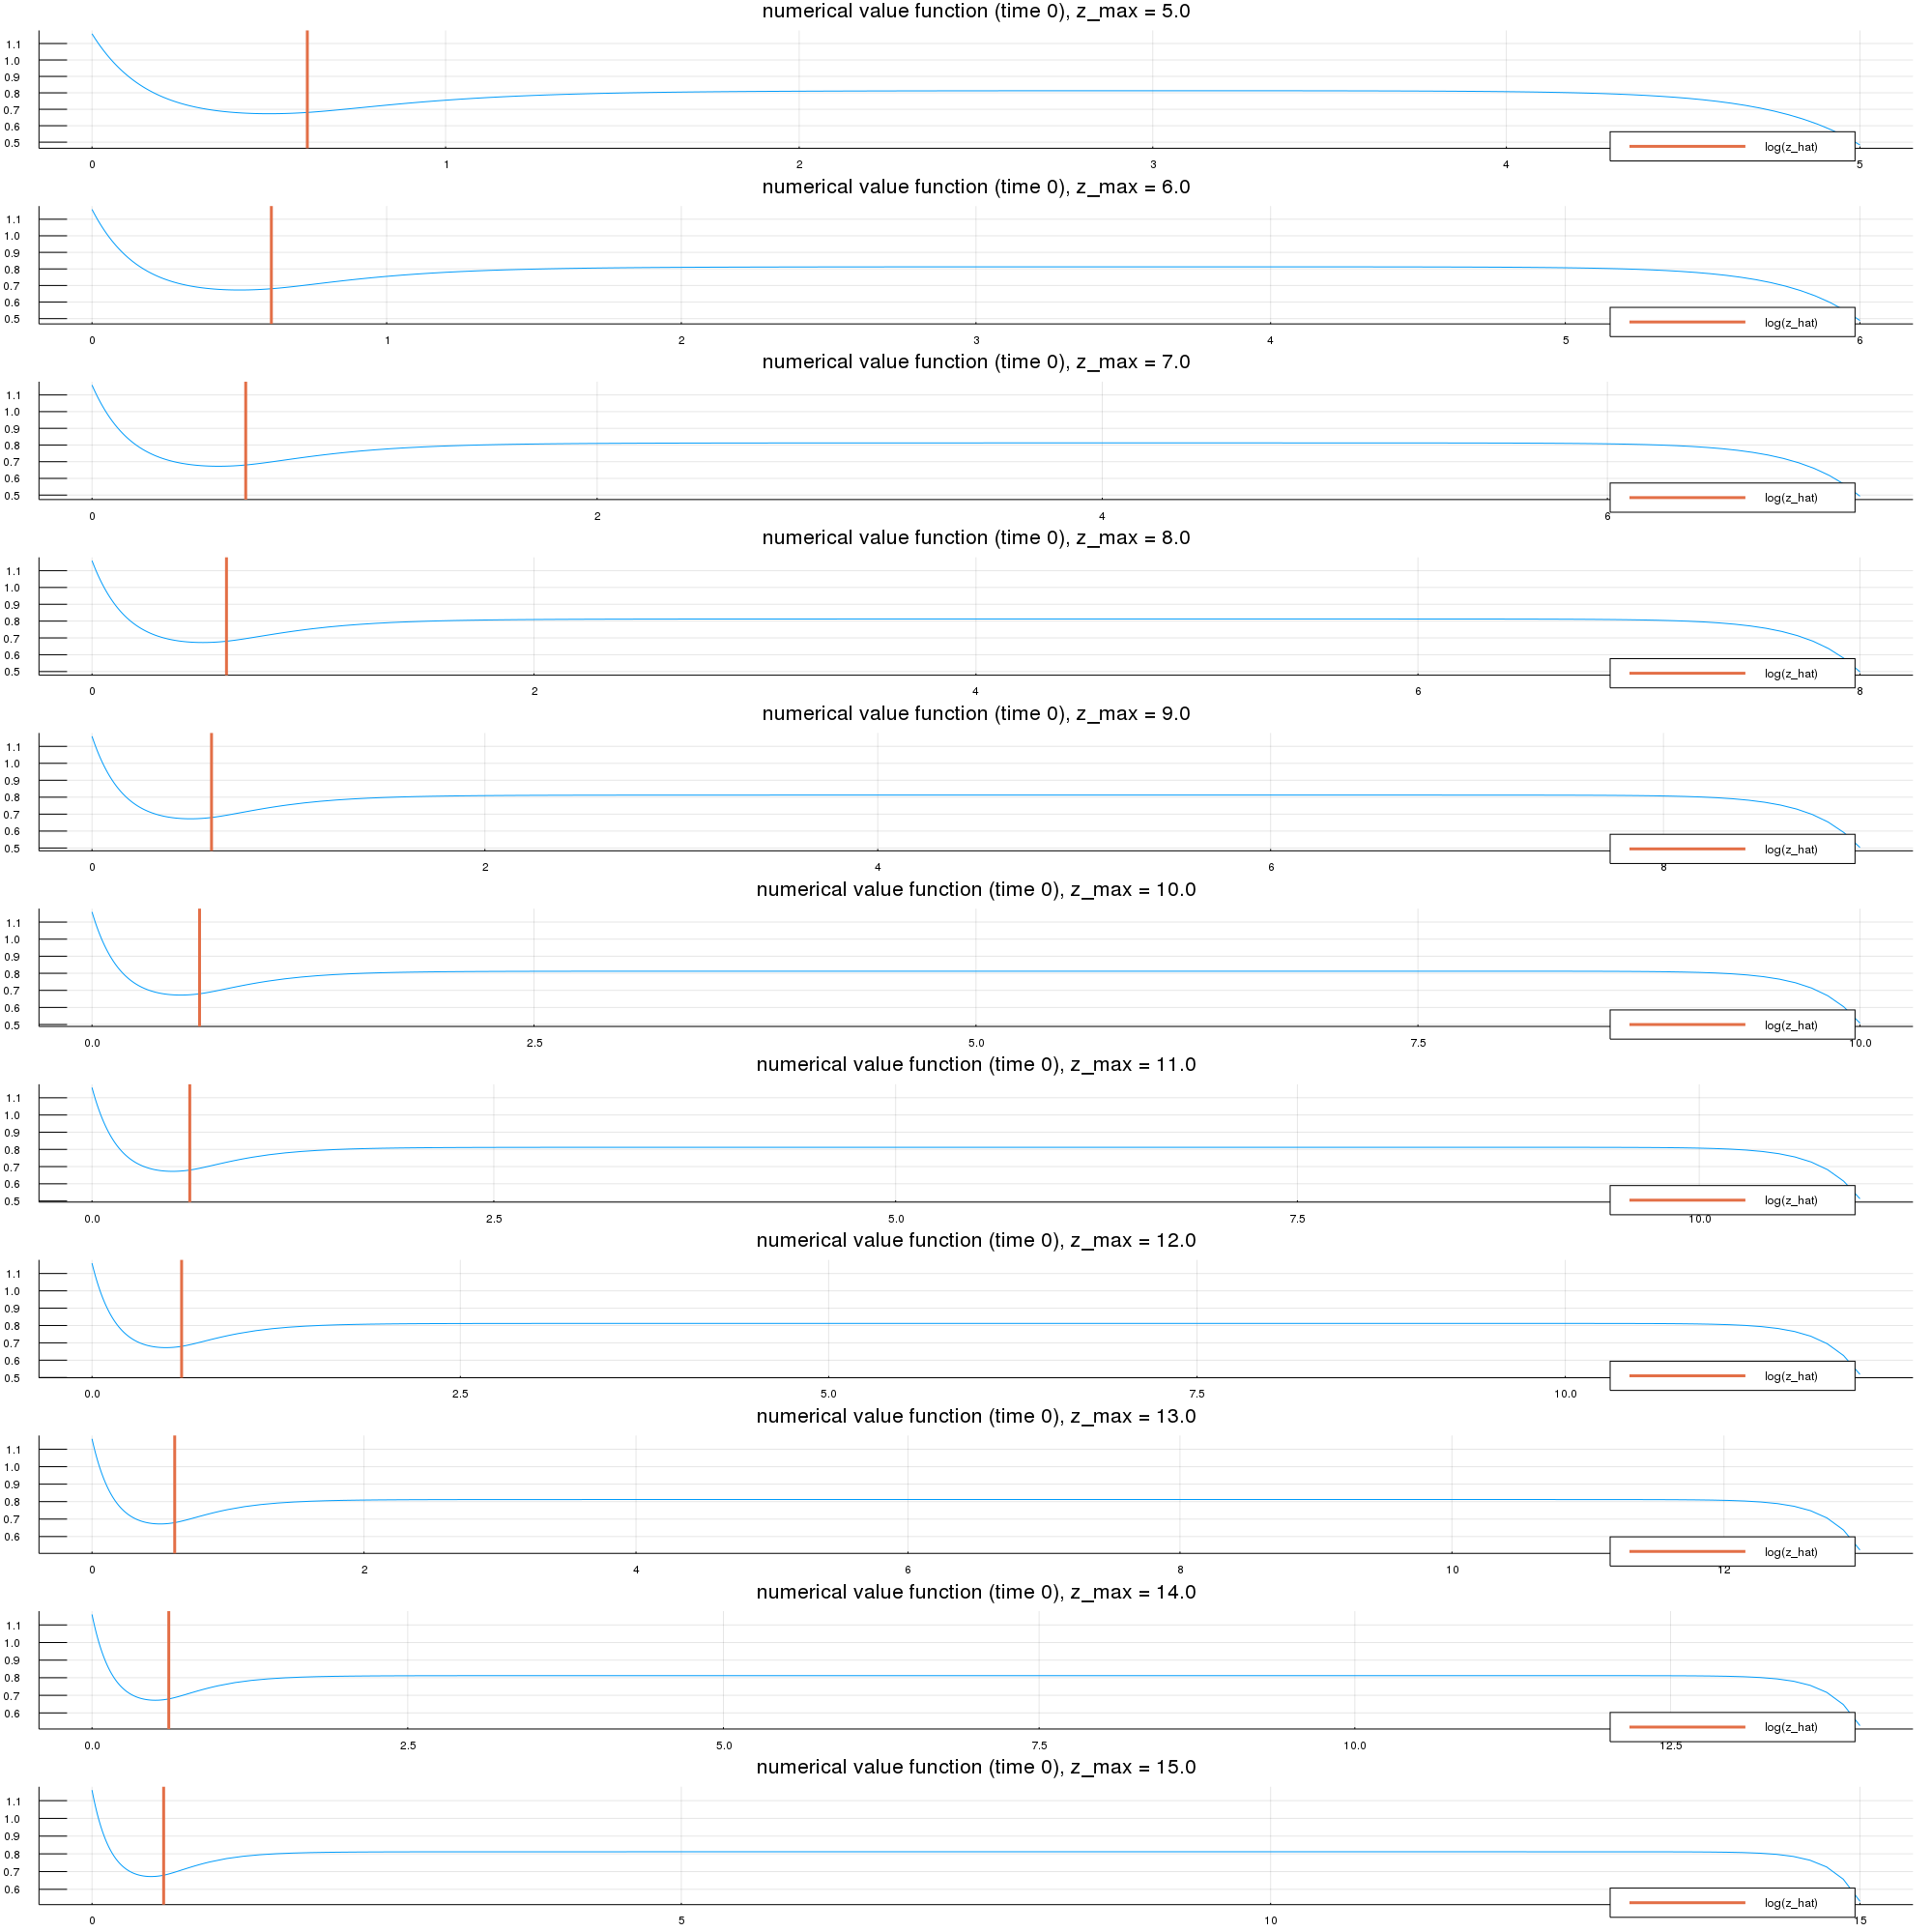

In [117]:
plot(plots..., layout = (length(z_maxes), 1), size = (2000, 2000))

## Home Trade Share Stuff

In [118]:
z_grid;

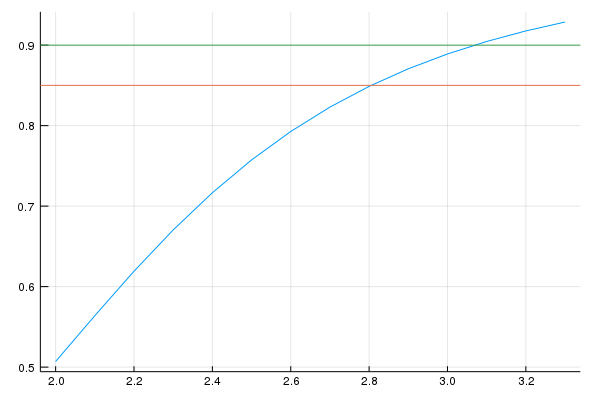

In [119]:
d_0s = 2.:0.1:3.3
plot(d_0s, x -> stationary_numerical(merge(params, (d = x,)), z_grid).λ_ii, label = "")
plot!([0.85], seriestype = "hline", label = "")
plot!([0.9], seriestype = "hline", label = "")

In [120]:
@show stationary_numerical(merge(params, (d = 2.8,)), z_grid).g
@show stationary_numerical(merge(params, (d = 3.07,)), z_grid).g

(stationary_numerical(merge(params, (d = 2.8,)), z_grid)).g = 0.01398289235901237
(stationary_numerical(merge(params, (d = 3.07,)), z_grid)).g = 0.010495477757309843


0.010495477757309843

In [122]:
@show stationary_numerical(merge(params, (d = 2.8,)), z_grid).λ_ii
@show stationary_numerical(merge(params, (d = 3.07,)), z_grid).λ_ii

(stationary_numerical(merge(params, (d = 2.8,)), z_grid)).λ_ii = 0.8488134125977267
(stationary_numerical(merge(params, (d = 3.07,)), z_grid)).λ_ii = 0.900192482928589


0.900192482928589